# INGEST

In [1]:
import numpy as np
import pandas as pd
import random
import sys
import time
import matplotlib.pyplot as plt

# GENERATE DATA

In [2]:
# set random seed. 
np.random.seed(12345)

# Generate an array with 10 random integers between 0 and 500. 
array = np.random.randint(100, 501, 10)

# DEFINE FUNCTIONS

In [3]:
# Define a function to find out the factorial of an input number with for loop. 

def fact_itera(x):
    ans = 1
    for i in range(1, x+1):
        ans = ans * i
    return ans

In [4]:
# Define a function to find out the factorial of an input number with recursion. 

def fact(x):
    if x == 1:
        return 1
    else: 
        return x * fact(x-1)

In [5]:
# Define a function to record runtimes to calculate factorial with for loop. 
# This is for function fact_itera. 

def fact_time_itera(array):
    fact_time = []
    for i in range(0,len(array)):
            start_time = time.perf_counter()
            fact_cal = fact_itera(array[i])
            end_time = time.perf_counter()
            fact_time.append((end_time - start_time) * 1000)
    return fact_time         

In [6]:
# Define a function to record runtimes to calculate factorial with recursion. 
# This is for function fact.

def fact_time(array):
    fact_time = []
    for i in range(0,len(array)):
            start_time = time.perf_counter()
            fact_cal = fact(array[i])
            end_time = time.perf_counter()
            fact_time.append((end_time - start_time) * 1000)
    return fact_time  

# TEST FUNCTION LIMITS

In [7]:
# Check current recursion limits. 
print(sys.getrecursionlimit())

3000


In [8]:
# Increase recusion limits. 
sys.setrecursionlimit(5000)
print(sys.getrecursionlimit())

5000


In [9]:
# Print factorial for number 3000 with both function. 

i = 3000
if fact(i) == fact_itera(i):
    print(f'Both functions works to calculate factorial of {i}')

Both functions works to calculate factorial of 3000


# CREATE TABLES AND GRAPH

In [10]:
# Create an array with Numpy of numbers, runtime with iteration, and runtime with recurrsion. 
data = np.array([array, fact_time_itera(array), fact_time(array)]).T

# Convert the array to a dataframe with Pandas and update the column names.  
df = pd.DataFrame(data)
df.columns = ['Number','Iteration Factorial Time (ms)', 'Recursion Factorial Time (ms)']
display(df)

# Sort the runtimes based on the numbers, from smallest to largets. 
final_df=df.sort_values(by=['Number'])
display(final_df)

<ipython-input-4-a0bafc362688>:7: RuntimeWarning: overflow encountered in long_scalars
  return x * fact(x-1)


,Number,Iteration Factorial Time (ms),Recursion Factorial Time (ms)
0,385.0,0.0728,0.3020
1,229.0,0.0247,0.1343
2,482.0,0.0811,0.2678
3,457.0,0.0707,0.2535
4,134.0,0.0116,0.0839
5,129.0,0.0107,0.0812
6,357.0,0.0473,0.1992
7,218.0,0.0216,0.1270
8,469.0,0.0854,0.2582
9,415.0,0.0616,0.2303


,Number,Iteration Factorial Time (ms),Recursion Factorial Time (ms)
5,129.0,0.0107,0.0812
4,134.0,0.0116,0.0839
7,218.0,0.0216,0.1270
1,229.0,0.0247,0.1343
6,357.0,0.0473,0.1992
0,385.0,0.0728,0.3020
9,415.0,0.0616,0.2303
3,457.0,0.0707,0.2535
8,469.0,0.0854,0.2582
2,482.0,0.0811,0.2678


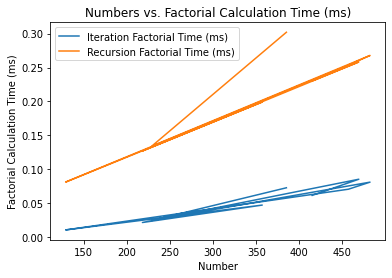

In [11]:
# Create a graph based on the dataframe. 
plt.plot(df['Number'], df['Iteration Factorial Time (ms)'], label = 'Iteration Factorial Time (ms)', )
plt.plot(df['Number'], df['Recursion Factorial Time (ms)'], label = 'Recursion Factorial Time (ms)')
plt.xlabel('Number')
plt.ylabel('Factorial Calculation Time (ms)')
plt.title('Numbers vs. Factorial Calculation Time (ms)')
plt.legend()

# CONCLUSION

We've created a random list of 10 numbers between 100 and 500, then recorded the different factorical calculation runtimes of these 10 numbers with iteration and recursion. Based on the above tables and graph, it seems like as the numbers get bigger, runtimes of both iteration and recursion get bigger. 

However, we've noticed the runtime differences in iteration and recursion for factorial calculation. In iteration with number n, we have to scan through 1, 2, 3, 4, ..., n-1 and n, then multiply them together. This is linear with n steps, and with a big O notation of O(n). 

In recursion with number n, let's understand its big O notation from time complexity. For each function state (except for f(1)), there are 2 states being generated. For example, f(2) generates f(2) state and f(1) state. Thus, in general, total number of states are approximately euqal to 2^n for computing n numbers. Thus, we can write its big O notation as O(2^n). Note that we also should consider memory limitation with recursion, since all functions are being generated and kept in memory in stack frames until they are called to terminate. 

Generally, since O(2^n) is greater than O(n), iteration usurally runs faster than recursion. However, we can see that the recursive logic is easier to understand, even for non-programmers. 